In [1]:
import numpy as np
# from zhenglin.dl.metrics import FID
from scipy import linalg
from torchmetrics.image.fid import FrechetInceptionDistance

real = np.load(r'10-18-2023-10:24:51_ground truth_motion_embeddings.npy')    # these two files were generated by /home/zhenglin/3DMotion/ACTOR/src/evaluate/action2motion/evaluate.py #Line 72
fake = np.load(r'10-18-2023-10:24:51_vald_motion_embeddings.npy')

In [2]:
fake.shape

(32, 512)

In [3]:
fake.shape == real.shape

False

In [4]:
fake

array([[ 0.7672554 ,  0.25021338, -0.12908407, ..., -0.03353632,
         0.88463616, -0.24180114],
       [ 0.8932704 ,  0.35195935, -0.06977048, ..., -0.39543355,
         0.35257623,  0.05023576],
       [ 0.8666886 ,  0.65581894,  0.01243343, ..., -0.54411346,
         0.503137  , -0.10007309],
       ...,
       [ 0.8315499 ,  0.37047023, -0.24004214, ..., -0.16413158,
         0.78446937, -0.10783958],
       [ 0.71092165,  0.72804546, -0.05676845, ..., -0.2477397 ,
         0.86555326, -0.39996508],
       [ 0.73119   ,  0.7260537 , -0.13275777, ..., -1.216819  ,
         0.4916341 , -0.04858366]], dtype=float32)

In [5]:
fake.shape

(32, 512)

In [6]:
remov_rows = []

if np.isnan(real).any():
    # find nan from real
    for i in range(real.shape[0]):
        for j in range(real.shape[1]):
            if np.isnan(real[i][j]):
                print(i, j)
                remov_rows.append(i)
                break

2778 0
3770 0


In [7]:
real_safe = np.delete(real, remov_rows, axis=0)
np.isnan(real_safe).any()

False

In [8]:
remov_rows = []

if np.isnan(fake).any():
    # find nan from real
    for i in range(real.shape[0]):
        for j in range(real.shape[1]):
            if np.isnan(fake[i][j]):
                print(i, j)
                remov_rows.append(i)
                break

In [9]:
fake_safe = np.delete(fake, remov_rows, axis=0)
np.isnan(fake_safe).any()

False

In [10]:
# shapiro-wilk test
# null hypothesis: the sample is drawn from a normal distribution
# once sample amount is more than 5000, shapiro-wilk test will be not reliable

import scipy

for i in range(512):
    x = real_safe[:, i]
    if scipy.stats.shapiro(x).pvalue < 0.05:
        print(i)

for i in range(512):
    x = fake_safe[:, i]
    if scipy.stats.shapiro(x).pvalue < 0.05:
        print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [11]:
# Kolmogorov-Smirnov test
# null hypothesis: the two distributions are identical(default, two-sided)
# tests are valid only for continuous distributions

from scipy.stats import kstest
normal_dist = np.random.randn(1000)
kstest(real_safe[:, 0],"norm")

KstestResult(statistic=0.6859763663139373, pvalue=0.0)

In [12]:
# D’Agostino and Pearson’s
# null hypothesis:  a sample comes from a normal distribution

from scipy.stats import normaltest

normaltest(real_safe[:, 0])

NormaltestResult(statistic=72.74603459374069, pvalue=1.597347100631913e-16)

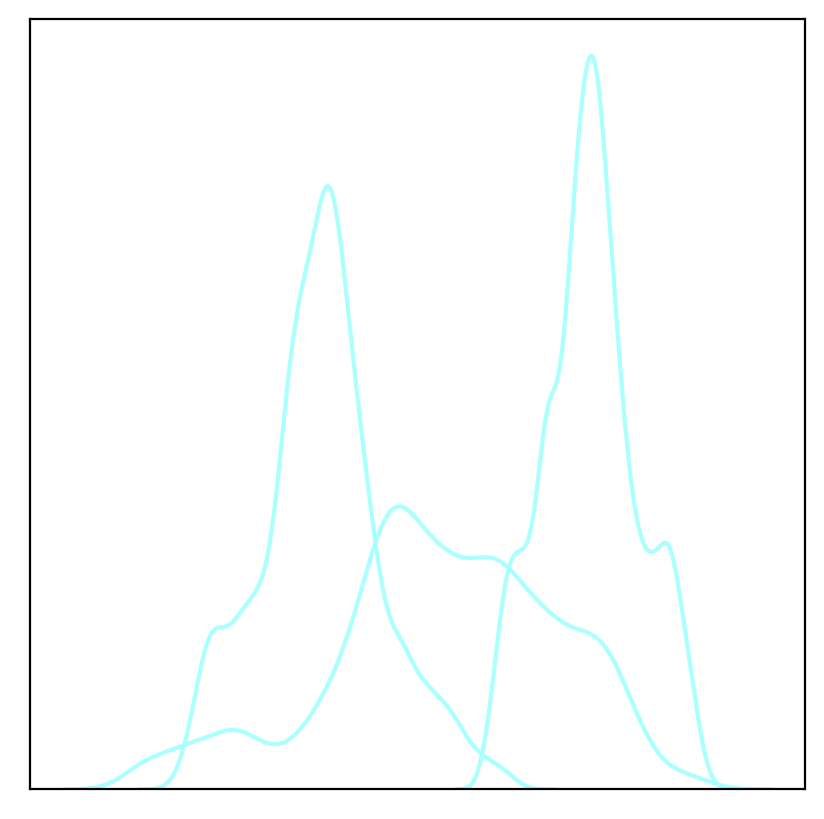

In [19]:
# illustration

import matplotlib.pyplot as plt
import seaborn as sns

# x = real_safe[:, 0]
# plt.hist(x, bins=100)

# plot kde
# sns.kdeplot(x, shade=True)

for i in range(5):
    x = fake_safe[:, i]
    sns.kdeplot(x, shade=False)

In [ ]:
# illustration

import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(5, 5), dpi=200)
ax = fig.add_subplot(111)
for i in range(3):
    x = real_safe[:, i]
    sns.kdeplot(x, shade=False, color='#AAFFFF', alpha=1, ax=ax)

# Hide xticks, yticks, xlabel, and ylabel
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('')
ax.set_ylabel('')

plt.show()


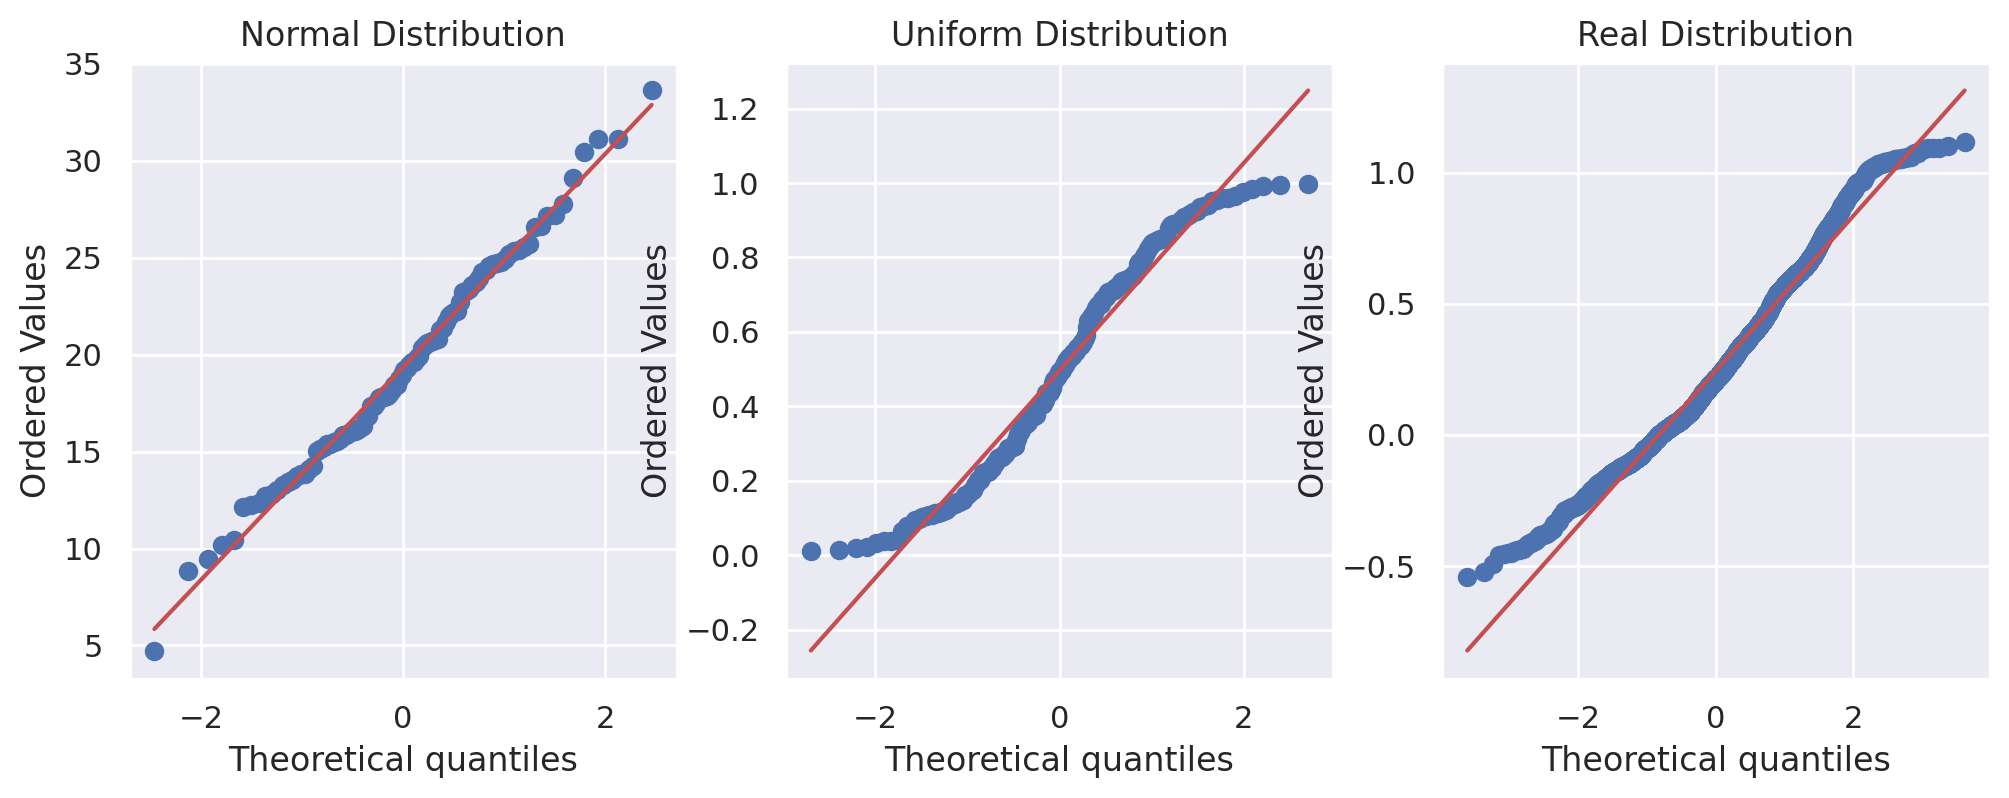

In [136]:
# probplot, PP plot 

import numpy as np 
import pylab 
import scipy.stats as stats

data_normal = np.random.normal(loc = 20, scale = 5, size=100)      # ideal normal distribution
data_real = real_safe[:, i]      # real distribution
data_uni = np.random.rand(200)      # uniform distribution

plt.figure(figsize=(12, 4))

ax1 = plt.subplot(1, 3, 1)
stats.probplot(data_normal, dist="norm", plot=pylab)
ax1.set_title("Normal Distribution")

ax2 = plt.subplot(1, 3, 2)
stats.probplot(data_uni, dist="norm", plot=pylab)
ax2.set_title("Uniform Distribution")

ax3 = plt.subplot(1, 3, 3)
stats.probplot(data_real, dist="norm", plot=pylab)
ax3.set_title("Real Distribution")

pylab.show()

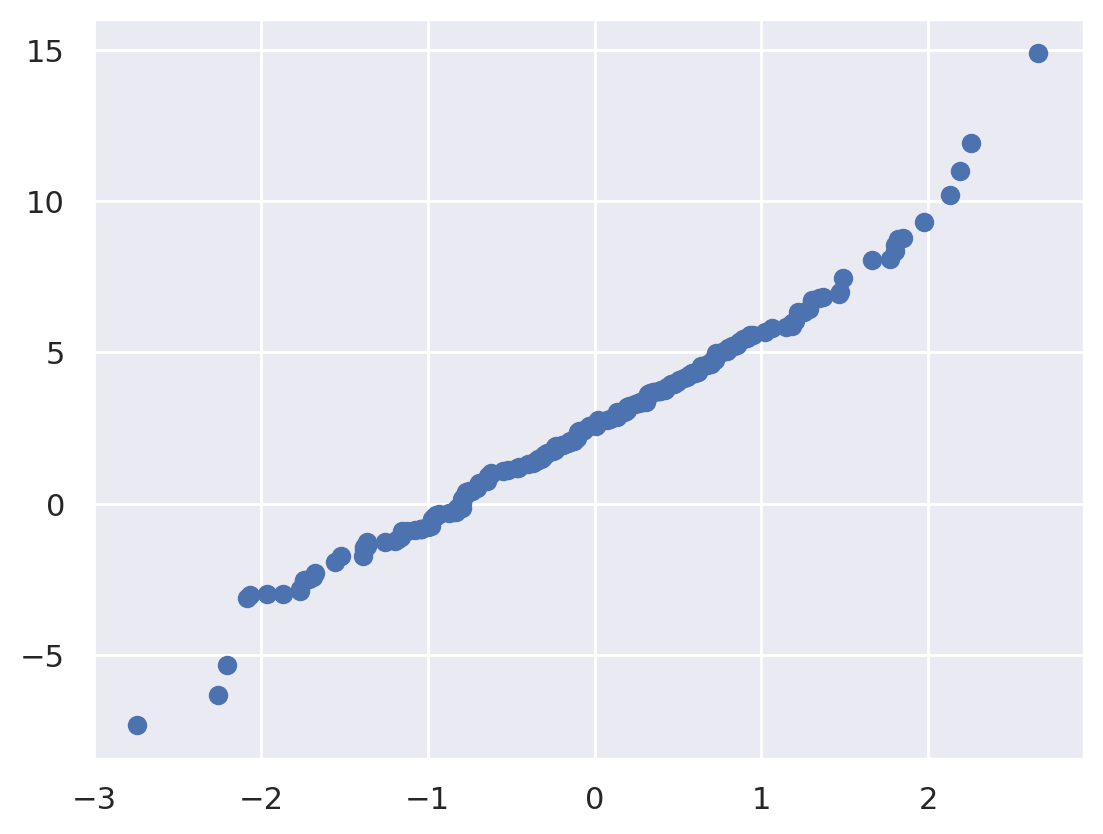

In [137]:
# testing
data_normal1 = np.random.normal(0, 1, 200)
data_normal1.sort()
data_normal2 = np.random.normal(2, 3, 200)
data_normal2.sort()
plt.scatter(data_normal1, data_normal2)

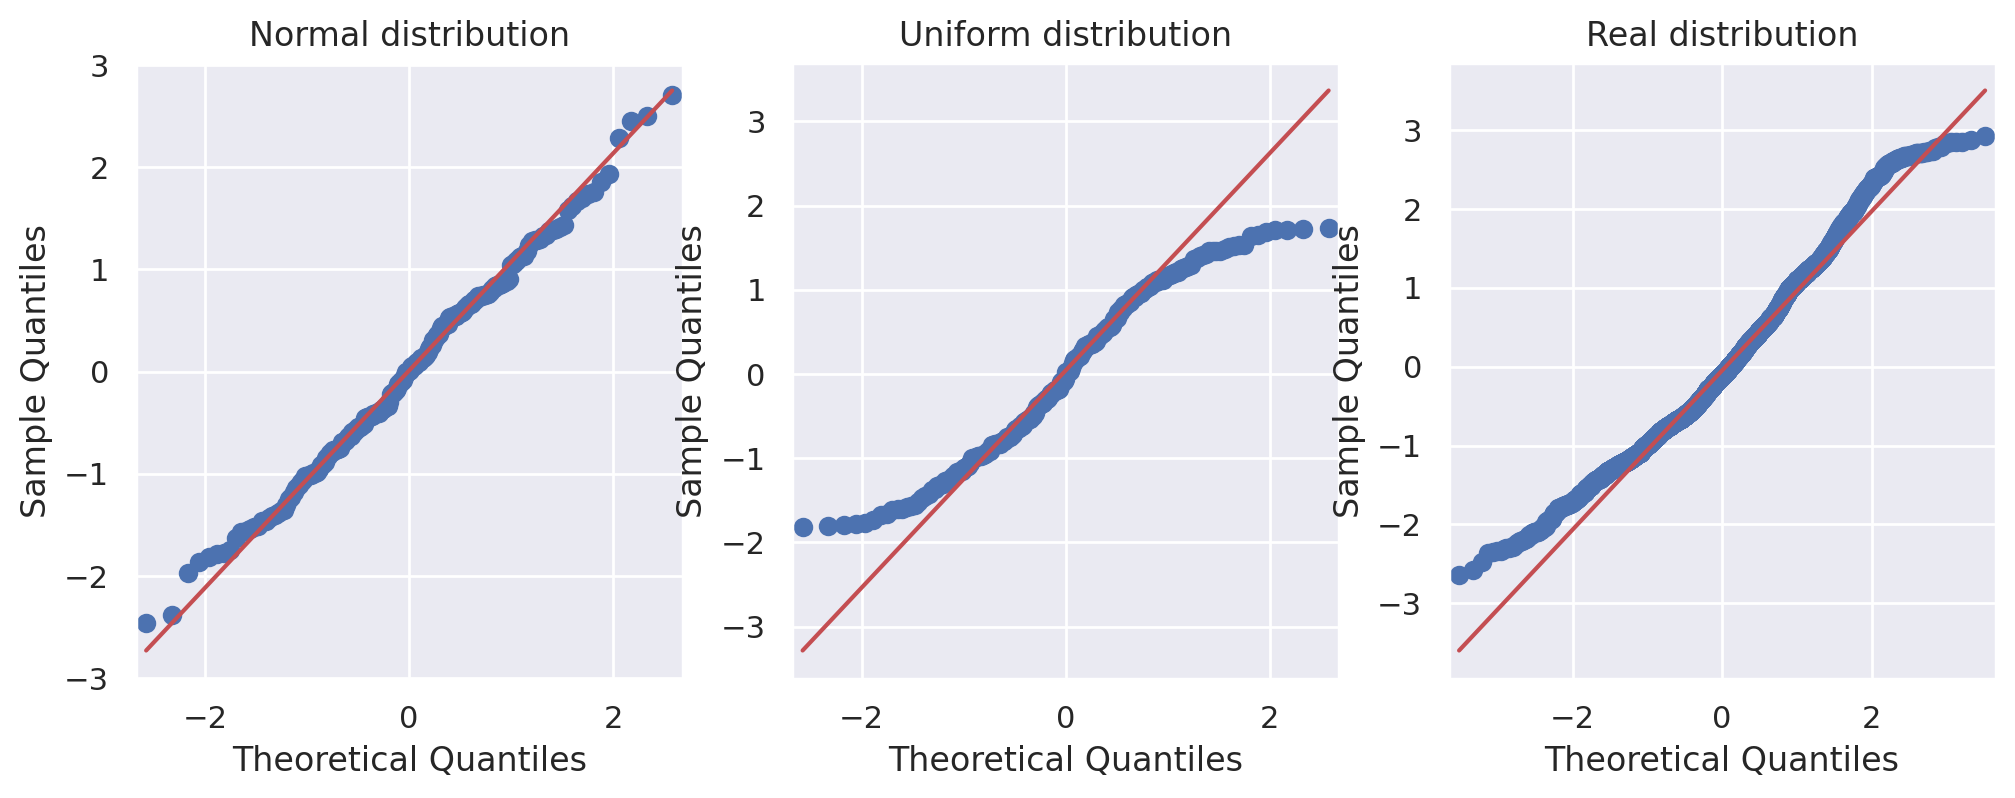

In [138]:
# qqplot

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.api import qqplot
 
sns.set_theme()# 设置风格
%config InlineBackend.figure_format = 'retina' # 让图片更清晰
 
mu, sigma = 0, 1      # 均值和标准差
data_normal = np.random.normal(mu, sigma, 200)
data_uni = np.random.rand(200)
data_real = real_safe[:, i]

fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(131)
fig = qqplot(data_normal, line="q", ax=ax1, fit=True)
ax1.set_title("Normal distribution")

ax2 = fig.add_subplot(132)
fig = qqplot(data_uni, line="q", ax=ax2, fit=True)
ax2.set_title("Uniform distribution")

ax3 = fig.add_subplot(133)
fig = qqplot(data_real, line="q", ax=ax3, fit=True)
ax3.set_title("Real distribution")

plt.show()

In [146]:
real = real_safe
fake = fake_safe

n1 = fake.shape[0]
n2 = real.shape[0]

mean_fake = np.mean(real, axis=0)[None, ...]
mean_real = np.mean(fake, axis=0)[None, ...]

cov_fake_sum = fake.T @ fake - n1 * mean_fake.T @ mean_fake
cov_real_sum = real.T @ real - n2 * mean_real.T @ mean_real

cov_fake = cov_fake_sum / (n1 - 1)
cov_real = cov_real_sum / (n2 - 1)

In [147]:
mu1, mu2, sig1, sig2 = mean_fake, mean_real, cov_fake, cov_real

print(np.isnan(mu1).any(), np.isnan(mu2).any(), np.isnan(sig1).any(), np.isnan(sig2).any())

sig1sig2 = sig1 @ sig2
sig1sig2

False False False False


array([[-9.04646277e-01,  2.11203888e-01, -4.18578207e-01, ...,
        -2.59257150e+00, -6.39520228e-01,  5.65150261e-01],
       [-5.25293648e-01,  1.74317932e+00,  6.01908565e-02, ...,
        -2.81658745e+00, -7.84610629e-01,  1.48113415e-01],
       [ 1.73943602e-02, -3.09987307e-01, -1.90129161e-01, ...,
        -2.42735013e-01,  3.42724234e-01, -3.87112573e-02],
       ...,
       [-4.22717690e-01, -2.77809358e+00, -6.08529806e-01, ...,
         4.40279388e+00,  1.94079137e+00, -9.21875358e-01],
       [-1.17803812e+00, -9.34460312e-02,  1.19650386e-01, ...,
         3.90255690e-01, -1.67721853e-01, -2.66298681e-01],
       [ 5.13217568e-01, -1.47467107e-03, -1.28928483e-01, ...,
        -9.33950782e-01, -2.76304424e-01,  4.94130462e-01]], dtype=float32)

In [148]:
a = np.sum((mu1 - mu2) ** 2)
b = np.trace(sig1 + sig2 - 2 * np.sqrt(sig1sig2))

/tmp/ipykernel_3992/1235932114.py:2: RuntimeWarning: invalid value encountered in sqrt
  b = np.trace(sig1 + sig2 - 2 * np.sqrt(sig1sig2))


In [149]:
import torch

mu1_tensor = torch.tensor(mu1)
mu2_tensor = torch.tensor(mu2)
sig1_tensor = torch.tensor(sig1)
sig2_tensor = torch.tensor(sig2) 

a = (mu1_tensor - mu2_tensor).square().sum(dim=-1)
b = sig1_tensor.trace() + sig2_tensor.trace()
c = torch.linalg.eigvals(sig1_tensor @ sig2_tensor).sqrt().real.sum(dim=-1)

a + b - 2 * c

tensor([13.5966])